<a href="https://colab.research.google.com/github/rhaagsma/Projeto_Final_Marvel/blob/main/InsightsPre%C3%A7osComics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comics
* Total de quadrinhos: 64273
* Quantidade de quadrinhos com preço 0: 24819

Ou seja, aproximadamente 38.62% dos quadrinhos estão com preço zerado

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
con = sqlite3.connect('banco.db')
# Carregar dados da tabela comics
df = pd.read_sql_query("SELECT price, year, date, pageCount FROM comics", con)
con.close()

# Estatísticas básicas
media = df['price'].mean()
minimo = df['price'].min()
maximo = df['price'].max()

print(f"Comics Totais: {df.shape[0]}")
print(f"Média: {media:.2f}")
print(f"Mínimo: {minimo:.2f}")
print(f"Máximo: {maximo:.2f}\n")

Comics Totais: 64272
Média: 6.14
Mínimo: 0.00
Máximo: 500.00



## Filtragem dos dados para analisar somente os quadrinhos com preço disponível

In [ ]:
# Filtrar apenas os preços > 0
df = df[(df['price'] > 0)]

# Estatísticas básicas
media = df['price'].mean()
minimo = df['price'].min()
maximo = df['price'].max()

print(f"Comics com preço diferente de 0: {df.shape[0]}")
print(f"Média: {media:.2f}")
print(f"Mínimo: {minimo:.2f}")
print(f"Máximo: {maximo:.2f}")

Comics com preço diferente de 0: 39459
Média: 10.00
Mínimo: 0.10
Máximo: 500.00


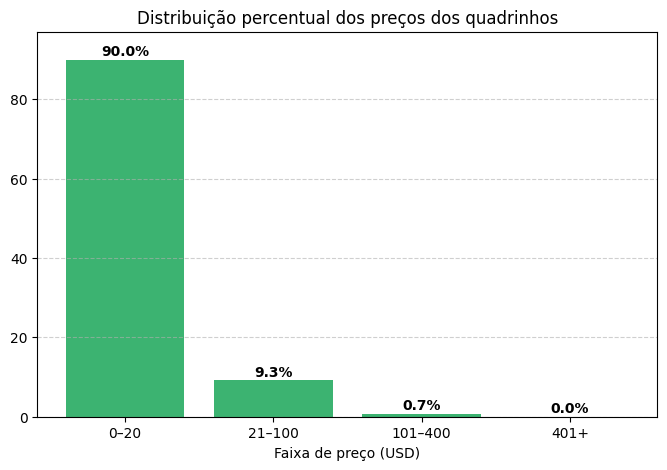

In [ ]:
# Criar as faixas de preço
bins = [0, 20, 100, 400, float('inf')]
labels = ['0–20', '21–100', '101–400', '401+']

# Criar nova coluna com a faixa de preço correspondente
df_temp = df
df_temp['faixa_preco'] = pd.cut(df_temp['price'], bins=bins, labels=labels, right=True)

# Contar a quantidade de quadrinhos por faixa
contagem = df_temp['faixa_preco'].value_counts().sort_index()

# Calcular porcentagens
porcentagens = (contagem / contagem.sum()) * 100


plt.figure(figsize=(8, 5))
plt.bar(porcentagens.index, porcentagens.values, color='mediumseagreen')
plt.title("Distribuição percentual dos preços dos quadrinhos")
plt.xlabel("Faixa de preço (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(0, porcentagens.max() + 7)


# Mostrar os valores percentuais acima das barras
for i, v in enumerate(porcentagens.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')

plt.show()

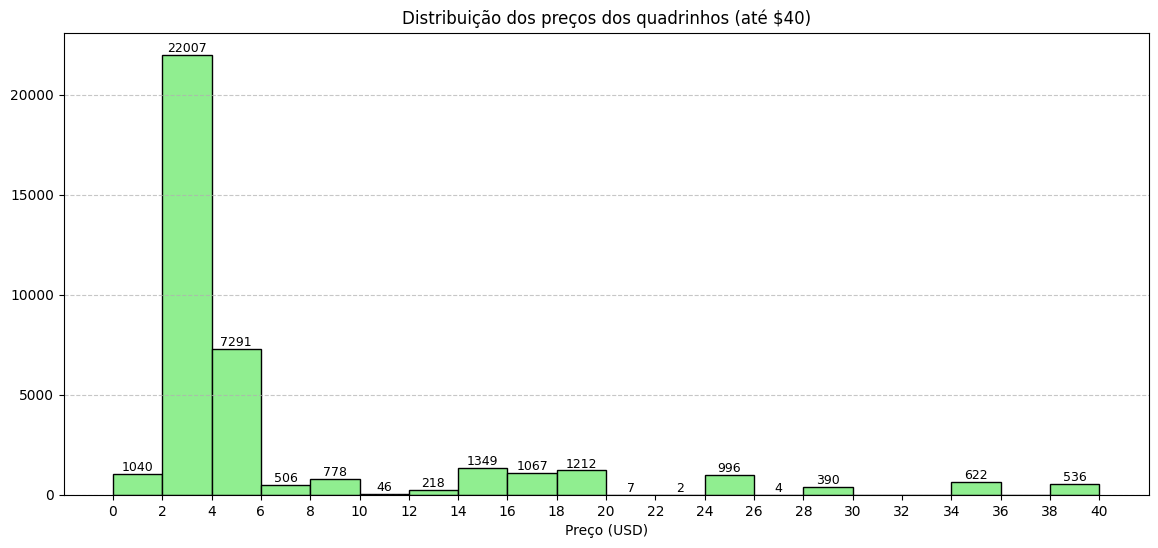

In [ ]:
plt.figure(figsize=(14, 6))
counts, bins, bars = plt.hist(df['price'], bins=range(0, 41, 2), edgecolor='black', color='lightgreen')
plt.title("Distribuição dos preços dos quadrinhos (até $40)")
plt.xlabel("Preço (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, 41, 2))

# Adicionar os valores acima de cada barra
for bar, count in zip(bars, counts):
    if count > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            count + 0.5,
            str(int(count)),
            ha='center', va='bottom', fontsize=9
        )

plt.show()


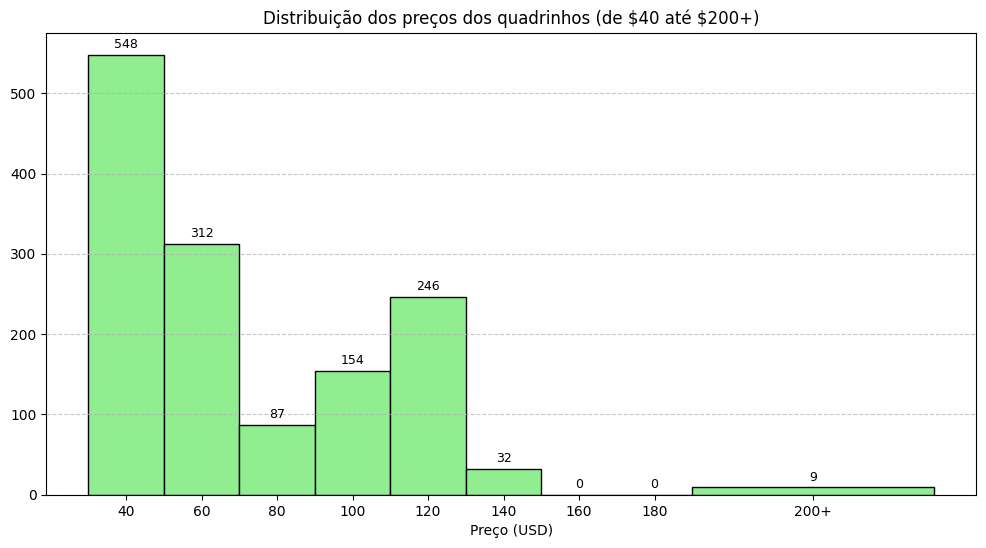

In [ ]:
# Definir os bins de 40 até 200 (de 20 em 20), e um bin final para preços > 200
bins = list(range(40, 201, 20)) + [df['price'].max() + 20]
counts, edges = np.histogram(df['price'], bins=bins)

widths = []
for i in range(len(edges) - 1):
    if edges[i] == 200:
        # Aumentar em 15% a largura da última barra
        largura = (edges[i+1] - edges[i]) * 0.20
    else:
        largura = edges[i+1] - edges[i]
    widths.append(largura)

# Posições no eixo X (alinhadas pela esquerda)
x_pos = [edges[i] for i in range(len(edges) - 1)]

# Plotar gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(x_pos, counts, width=widths, align='edge', edgecolor='black', color='lightgreen')

plt.title("Distribuição dos preços dos quadrinhos (de \$40 até \$200+)")
plt.xlabel("Preço (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

def calcular_centros_customizados(bins, limite=200, centro_personalizado=232):
    centros = []
    for i in range(len(bins) - 1):
        if bins[i] >= limite:
            centros.append(centro_personalizado)
        else:
            centros.append((bins[i] + bins[i+1]) / 2)
    return centros

centros = calcular_centros_customizados(bins)
plt.xticks(centros, [f'{bins[i]}+' if bins[i] >= 200 else f'{bins[i]}' for i in range(len(bins) - 1)])

# Mostrar os valores acima de cada barra
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posição X centralizada na barra
        height + 5,                         # Um pouco acima da barra
        str(height),                        # O valor da frequência
        ha='center', va='bottom', fontsize=9
    )


plt.show()

## Ocorrências dos preços 200 e 500

In [ ]:
df_temp = df[(df['price'] >= 500)]
print(f"Quantidade de preços iguais à $500: {df_temp.shape[0]}")
df_temp = df[(df['price'] >= 200) & (df['price'] < 220)]
print(f"Quantidade de preços iguais à $200: {df_temp.shape[0]}")

Quantidade de preços iguais à $500: 2
Quantidade de preços iguais à $200: 7


## Ano de Lançamento do título do quadrinho
Extraímos a data presente no título dos quadrinhos para termos uma aproximação do ano de lançamento

Alguns quadrinhos não possuíam o ano no título, por isso, para essa análise filtramos os dados somente pelos quadrinhos com o ano de lançamento presente no título

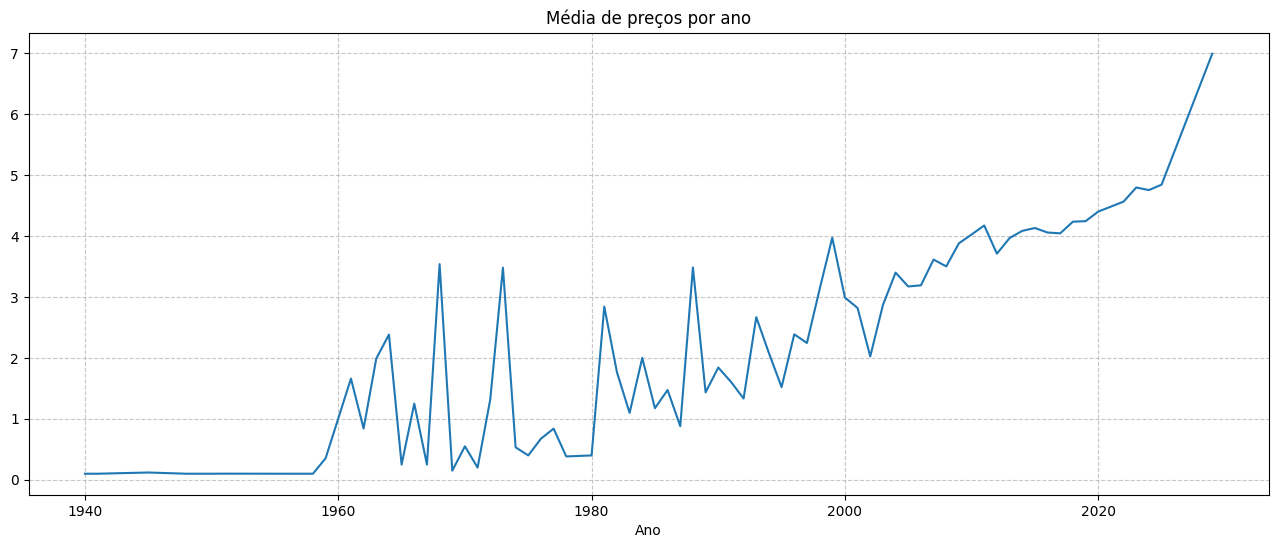

In [ ]:
# Filtrar apenas os anos diferentes de 0 e preços > 0
df_validos = df[(df['year'] != 0) & (df['price'] > 0)]

df_validos.groupby('year')['price'].mean().plot(kind='line', figsize=(16, 6))
plt.title("Média de preços por ano")
plt.xlabel("Ano")
plt.grid(linestyle='--', alpha=0.7)
plt.show()


Da mesma forma, temos muitos quadrinhos com 0 ou 1 páginas

Removemos os quadrinhos com page count menor que 1

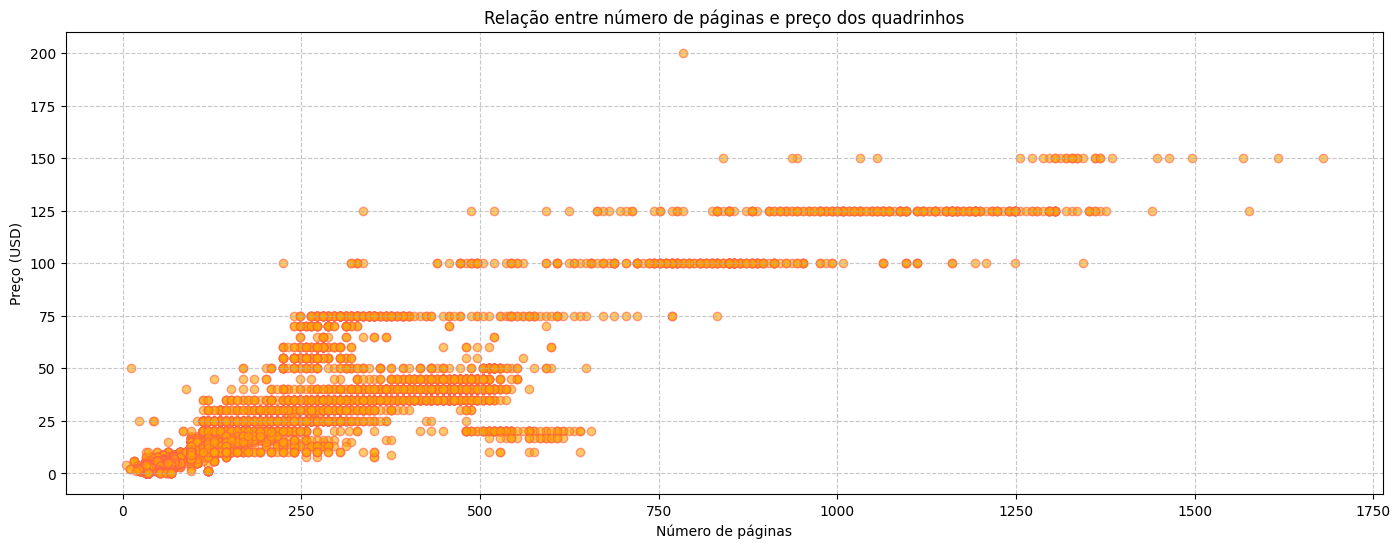

In [ ]:
df_validos = df[(df['pageCount'] > 1) & (df['price'] > 0)]

plt.figure(figsize=(17, 6))
plt.scatter(df_validos['pageCount'], df_validos['price'], alpha=0.6, color='orange', edgecolors='tomato')
plt.title("Relação entre número de páginas e preço dos quadrinhos")
plt.xlabel("Número de páginas")
plt.ylabel("Preço (USD)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Top 10 personagens que estão em mais comics

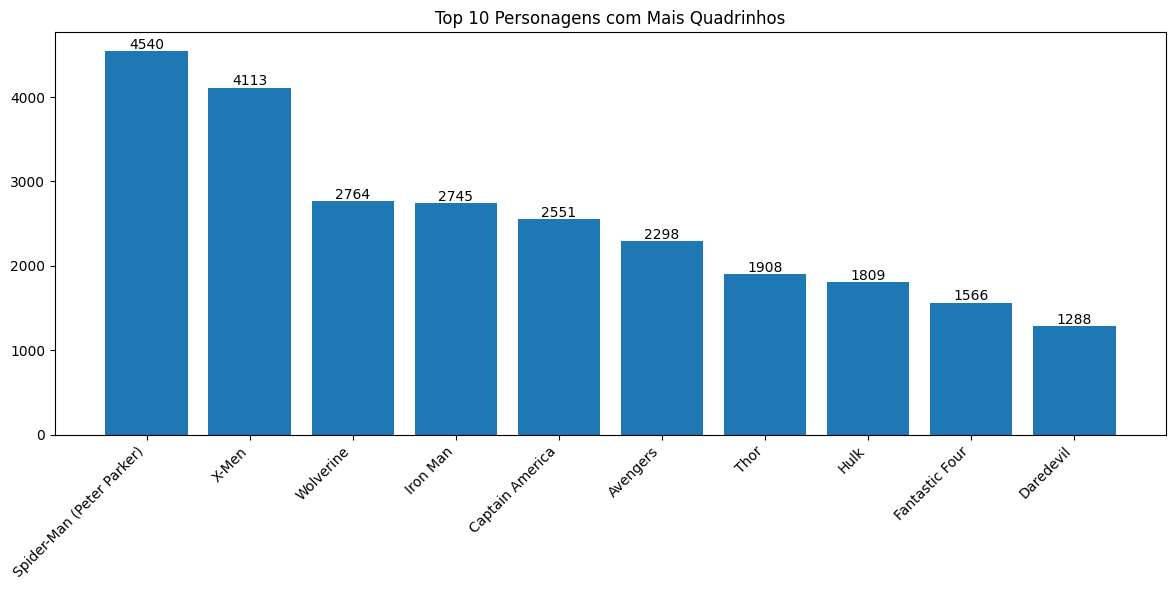

In [ ]:
con = sqlite3.connect('banco.db')
query = """
      SELECT
            name,
            comics_available
      FROM characters
      ORDER BY comics_available DESC
      LIMIT 10;
"""
df = pd.read_sql_query(query, con)
con.close()

plt.figure(figsize=(12, 6))
plt.bar(df['name'], df['comics_available'])
plt.title("Top 10 Personagens com Mais Quadrinhos")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, v in enumerate(df['comics_available']):
    plt.text(i, v + 25, f"{v}", ha='center')

plt.show()

### Personagens que participaram de mais eventos

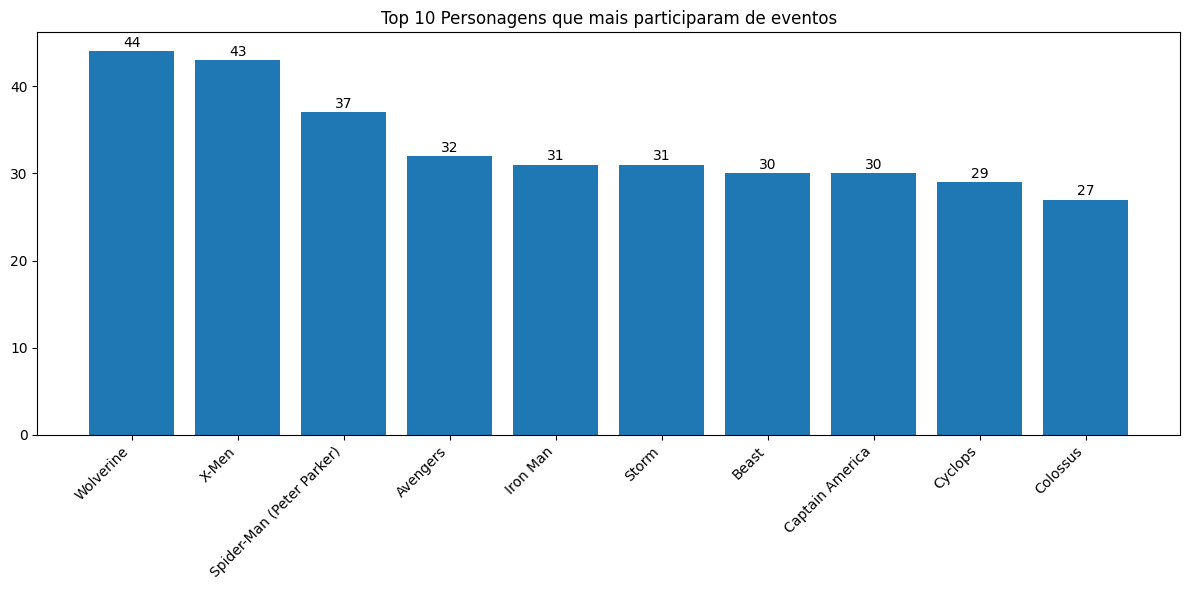

In [ ]:

con = sqlite3.connect('banco.db')
query = """
      SELECT
            name,
            events_available
      FROM characters
      ORDER BY events_available DESC
      LIMIT 10;
"""
df_personagens = pd.read_sql_query(query, con)
con.close()

plt.figure(figsize=(12, 6))
plt.bar(df_personagens['name'], df_personagens['events_available'])
plt.title("Top 10 Personagens que mais participaram de eventos")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, v in enumerate(df_personagens['events_available']):
    plt.text(i, v + 0.5, f"{v}", ha='center')

plt.show()

### Quantidade de participações de personagem em quadrinhos por evento

In [ ]:
conn = sqlite3.connect('banco.db')

query = """
        SELECT
            e.title AS evento,
            ch.name AS personagem,
            COUNT(*) AS total_participacoes,
            e.amount_comics AS quantidade_comics,
            ROW_NUMBER() OVER (PARTITION BY e.title ORDER BY COUNT(*) DESC) AS posicao
        FROM comics c
        JOIN characters_comics cc ON cc.comic_id = c.id
        JOIN characters ch ON cc.character_id = ch.id
        JOIN comics_events ce ON ce.comic_id = c.id
        JOIN events e ON ce.event_id = e.id
        GROUP BY e.id, e.title, ch.name
        ORDER BY quantidade_comics DESC
"""

df2 = pd.read_sql_query(query, conn)
conn.close()

In [ ]:
df2.head(5)

,evento,personagem,total_participacoes,quantidade_comics,posicao
0,Dark Reign,Norman Osborn,28,199,1
1,Dark Reign,Spider-Man (Peter Parker),22,199,2
2,Dark Reign,Iron Man,20,199,3
3,Dark Reign,Dark Avengers,17,199,4
4,Dark Reign,Thunderbolts,16,199,5


### Personagens com mais participações em eventos

In [ ]:
df_grouped_by_character = df2[df2['posicao'] == 1].groupby('personagem').size().reset_index(name='vezes_mais_participacoes')
df_grouped_by_character = df_grouped_by_character.sort_values(by='vezes_mais_participacoes', ascending=False)

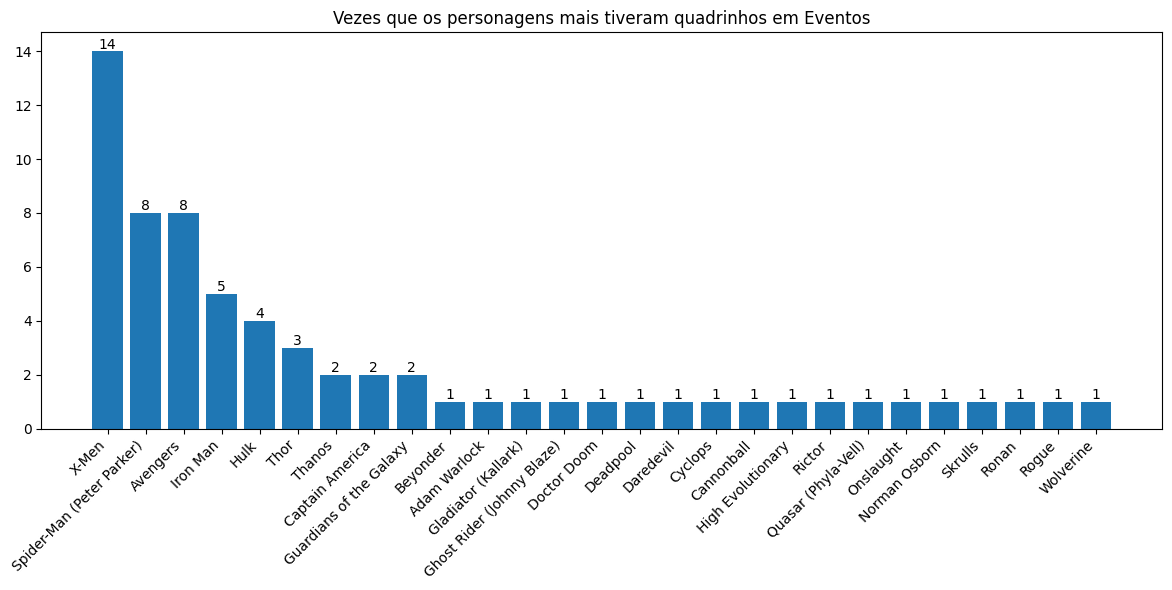

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(df_grouped_by_character['personagem'], df_grouped_by_character['vezes_mais_participacoes'])
plt.title("Vezes que os personagens mais tiveram quadrinhos em Eventos")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, v in enumerate(df_grouped_by_character['vezes_mais_participacoes']):
    plt.text(i, v + 0.1, f"{v}", ha='center')

plt.show()

### Top 10 eventos com mais quadrinhos

### Personagens com mais participações em comics por evento

In [ ]:
result_df = (df2[df2['posicao'] == 1]).reset_index(drop=True)
colunas_desejadas = ['evento', 'personagem', 'total_participacoes', 'quantidade_comics']
df_comics = result_df[colunas_desejadas].head(25)
df_comics.head()

,evento,personagem,total_participacoes,quantidade_comics
0,Dark Reign,Norman Osborn,28,199
1,Secret Invasion,Skrulls,40,163
2,Civil War,Iron Man,44,138
3,Secret Wars (2015),Avengers,9,138
4,Initiative,Iron Man,24,96


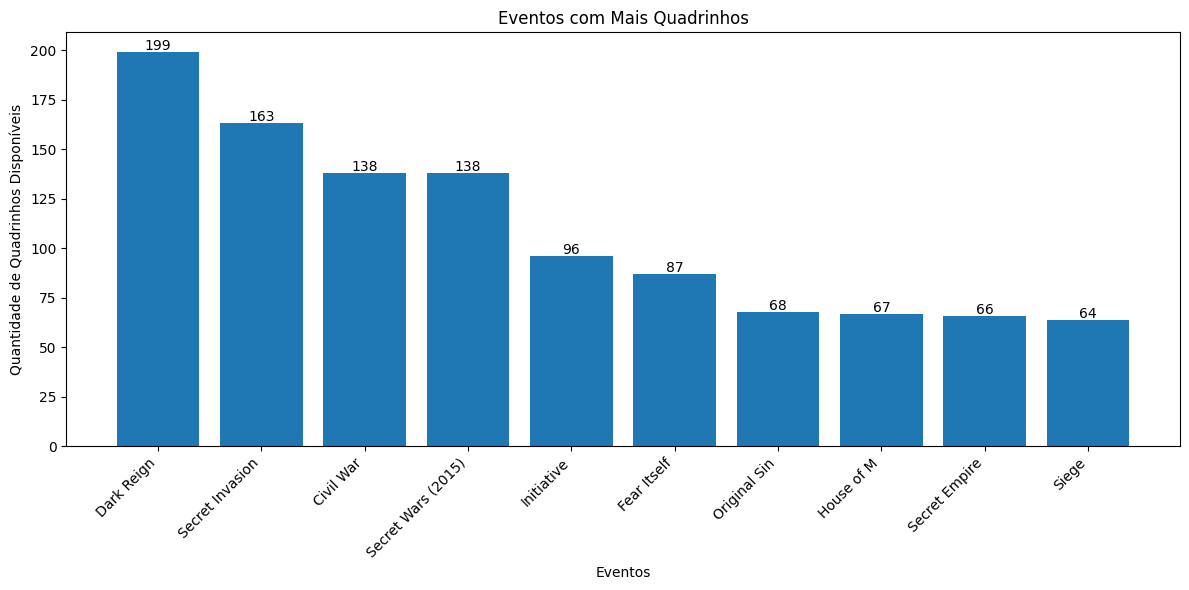

In [ ]:
result_df = (df2[df2['posicao'] == 1]).reset_index(drop=True)
colunas_desejadas = ['evento', 'quantidade_comics']
df_eventos = result_df[colunas_desejadas].head(10)
df_eventos

plt.figure(figsize=(12, 6))
plt.bar(df_eventos['evento'].astype(str), df_eventos['quantidade_comics'])
plt.xlabel("Eventos")
plt.ylabel("Quantidade de Quadrinhos Disponíveis")
plt.title("Eventos com Mais Quadrinhos")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, v in enumerate(df_eventos['quantidade_comics']):
    plt.text(i, v + 1, f"{v}", ha='center')

plt.show()

### Top 10 personagens com mais participações Nos eventos mais relevantes

In [ ]:
result_df = (df2[df2['posicao'].isin(range(1,11))]).reset_index(drop=True)
colunas_desejadas = ['evento', 'personagem', 'total_participacoes', 'quantidade_comics']
df_comics = result_df[colunas_desejadas].head(100)
df_comics.columns

Index(['evento', 'personagem', 'total_participacoes', 'quantidade_comics'], dtype='object')

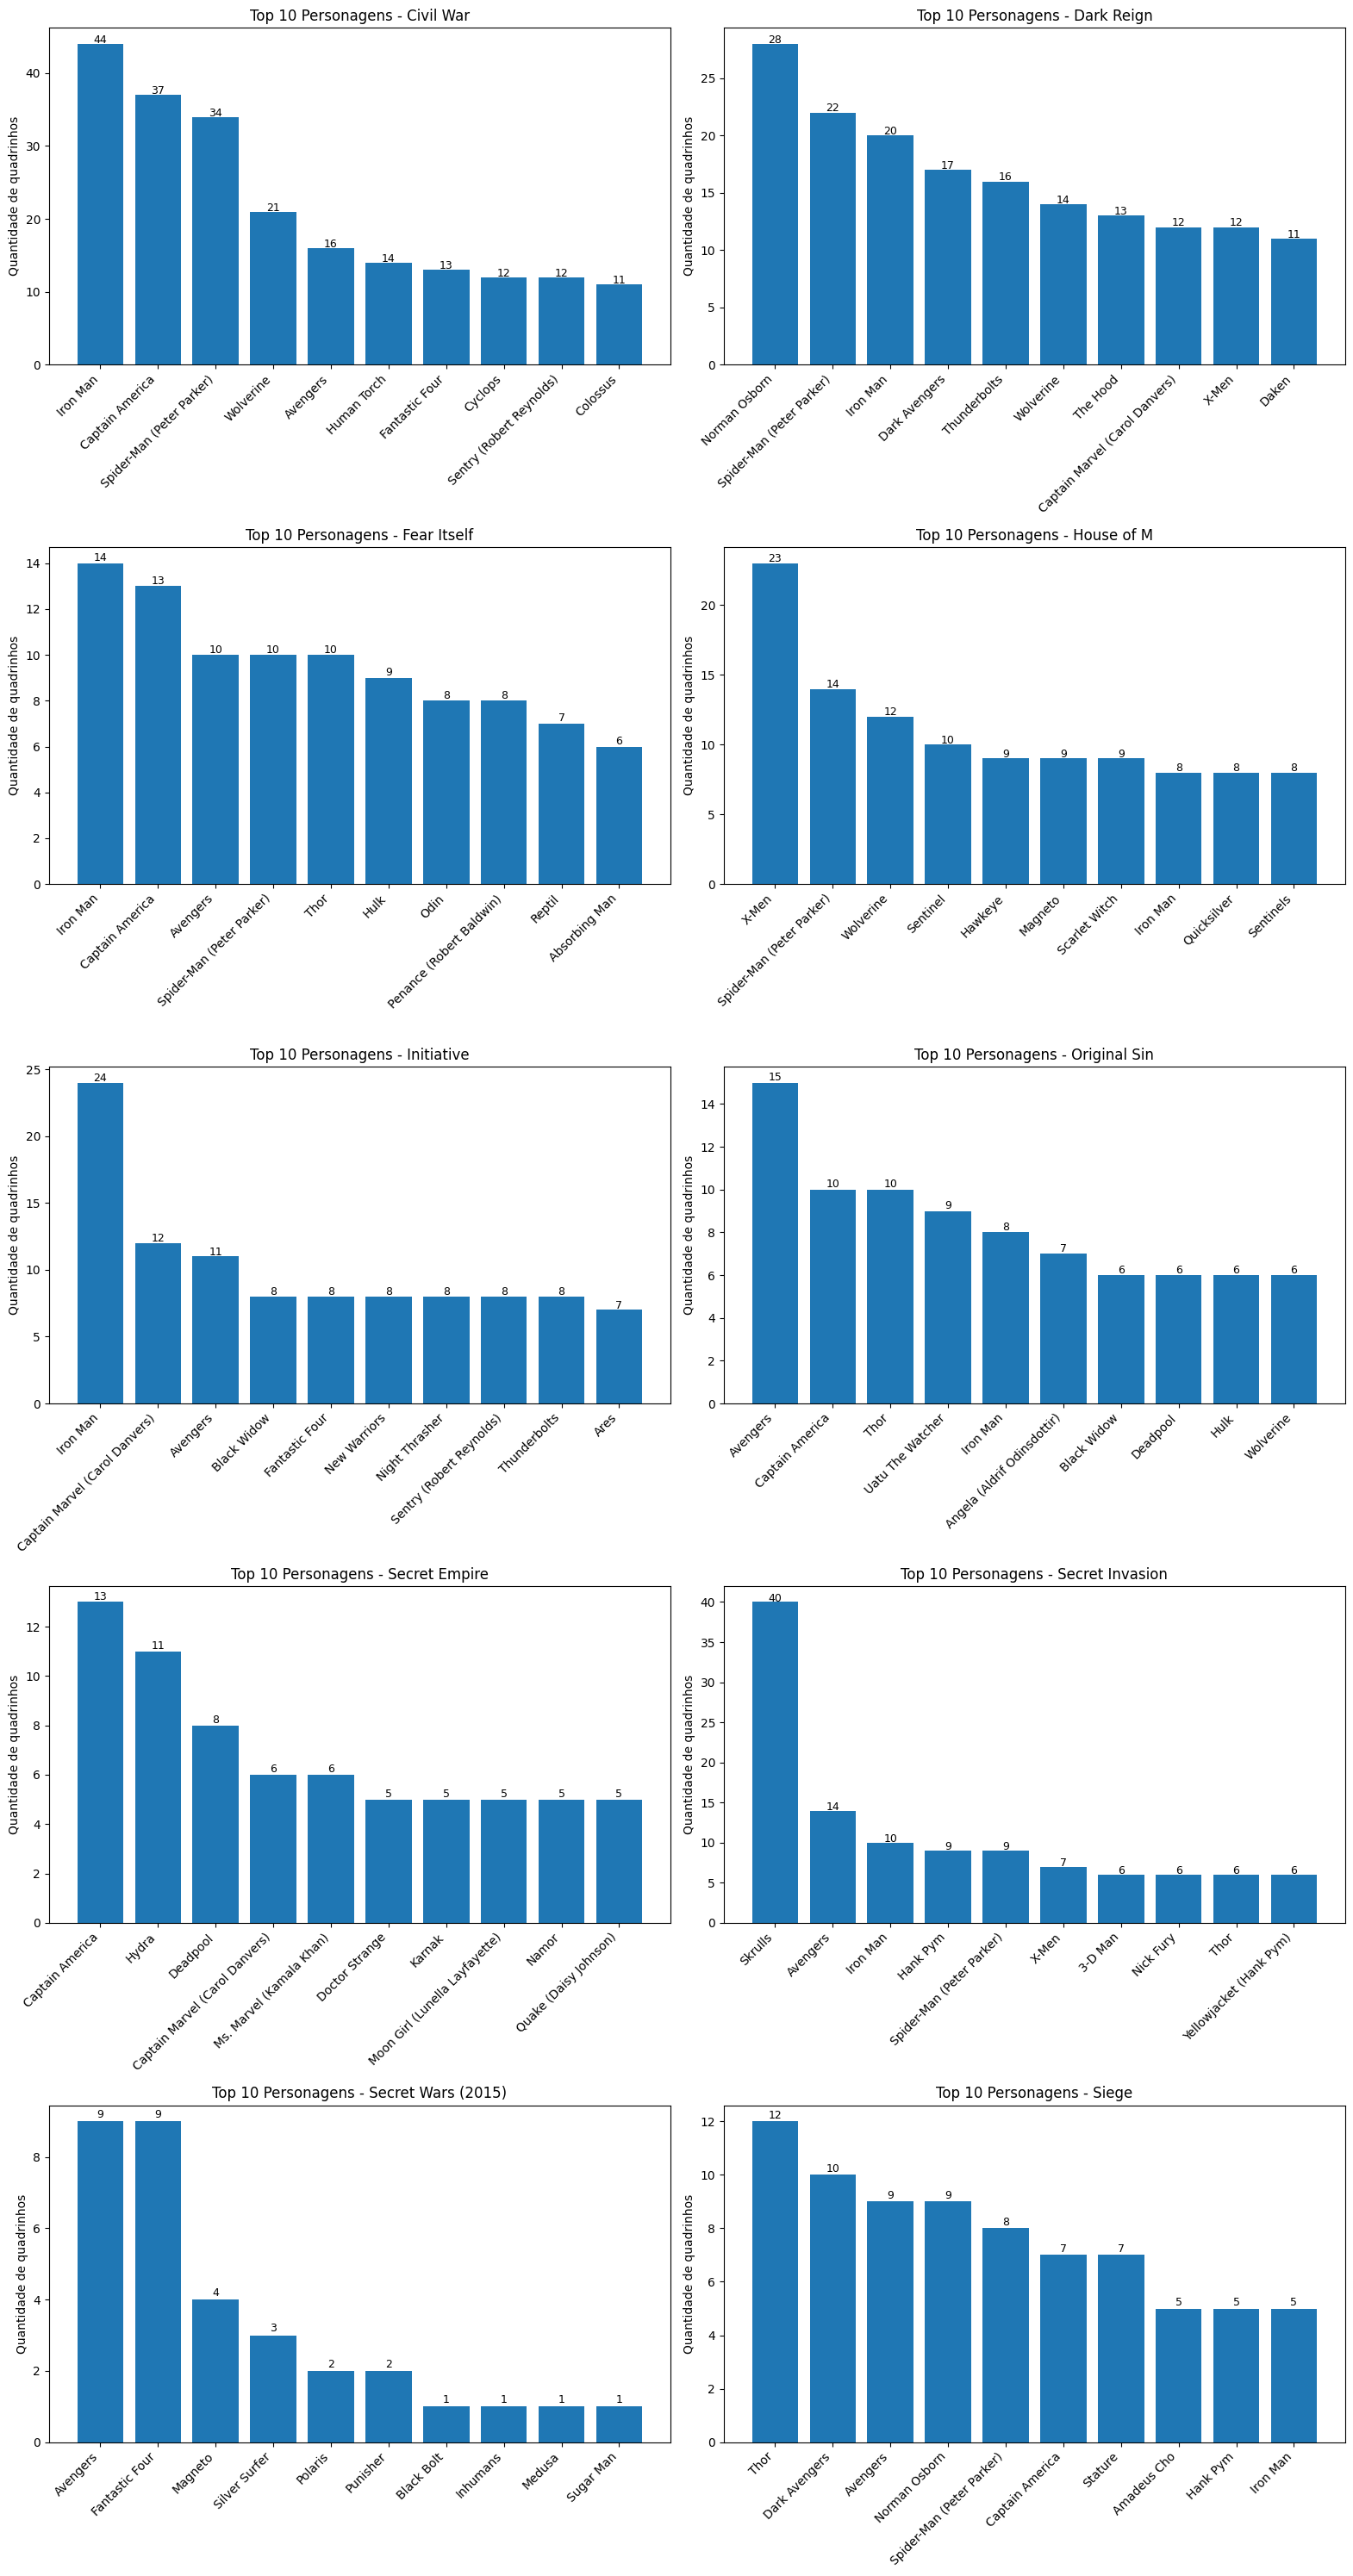

In [ ]:
eventos = df_comics['evento'].unique()
eventos.sort()

# Layout dos subplots
num_eventos = len(eventos)
linhas = (num_eventos + 1) // 2
colunas = 2

# Tamanho da figura
plt.figure(figsize=(16, 6 * linhas))

# Loop para criar um subplot por década
for i, dec in enumerate(eventos, 1):
    plt.subplot(linhas, colunas, i)
    dados = df_comics[df_comics['evento'] == dec].sort_values('total_participacoes', ascending=False)

    personagens = dados['personagem']
    participacoes = dados['total_participacoes']

    plt.bar(personagens, participacoes)
    plt.title(f"Top 10 Personagens - {dec}")
    plt.ylabel("Quantidade de quadrinhos")
    plt.xticks(rotation=45, ha='right')

    # Adiciona os valores acima das barras
    for j, v in enumerate(participacoes):
        plt.text(j, v + 0.1, str(v), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Insights Characters

Temos muitas descrições vaizas
- Quantos personagens tem descrição em relação ao total de personagens
- Quantos personagens estão sem quadrinhos disponíveis (comics available)

In [ ]:
con = sqlite3.connect('banco.db')
# Carregar dados da tabela Characters
df_characters = pd.read_sql_query("SELECT name, description, comics_available FROM characters", con)
con.close()

total_personagens = df_characters.shape[0]

com_descricao = df_characters[df_characters['description'].str.strip() != ''].shape[0]
sem_descricao = total_personagens - com_descricao

print(f"Total de personagens: {total_personagens}")
print(f"Com descrição: {com_descricao} ({com_descricao / total_personagens:.1%})")
print(f"Sem descrição: {sem_descricao} ({sem_descricao / total_personagens:.1%})")


Total de personagens: 1564
Com descrição: 305 (19.5%)
Sem descrição: 1259 (80.5%)


In [ ]:
sem_quadrinhos = df_characters[df_characters['comics_available'] == 0].shape[0]

print(f"Personagens sem quadrinhos disponíveis: {sem_quadrinhos} ({sem_quadrinhos / total_personagens:.1%})")


Personagens sem quadrinhos disponíveis: 271 (17.3%)
